# Lending Club Case Study
                                                                                                  Dated: 19-May-2021
                                                                                                  Abhishek Singh
                                                                                                  aulakh.abhishek@gmail.com
***

#### **Assignment**

Lending Club is a consumer finance company Lending Club which specialises in lending various types of loans to urban customers. The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.
Lending Club When receives a loan application, it has to make a decision for loan approval based on the applicant’s profile. When a person applies for a loan, there are two types of decisions that could be taken by the company:

>1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

>>- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

>>- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

>>- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

>2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
***
#### **Data**
Data for Loans approved through Lending Club between 2007 to 2011 is provided which contains basic information about the loan application details along with confirmation if the applicant has ‘Fully Paid’ Or ‘Charged Off’ the loan


#### **Business Objectives**
Business objective of this analysis will be to get insights from the data to indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


***
### Exploratory Data Analysis

***
- Importing all the libraries here

In [1]:
# All libraries are imported in this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime 
warnings.filterwarnings('ignore')
from pprint import pprint 
%matplotlib inline
sns.set_style("darkgrid")

- Importing the loan dataset

In [2]:
loan = pd.read_csv('loan.csv',encoding='ISO-8859-1')

In [3]:
# Looking on basic structure of the dataset
print(loan.shape)
print(loan.head(5))
loan.describe()

(39717, 111)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN  

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

### Data Cleaning

In [4]:
# Analysing the percentage of missing values in each field for loan dataset
nullpct = round((loan.isnull().sum() /len(loan) * 100),2)
# Lisiting out all column with missing value
print(pd.DataFrame(nullpct.loc[nullpct > 0]))

                                 0
emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
...                            ...
tax_liens                     0.10
tot_hi_cred_lim             100.00
total_bal_ex_mort           100.00
total_bc_limit              100.00
total_il_high_credit_limit  100.00

[68 rows x 1 columns]


- We can see that 68 out of 111 columns have missing data, in some cases 100% of the rows have null value, We need to clean up the dataset before analysing it
***
<br>
- Removing all columns which have data missing for more that 80% of the rows


In [5]:
columns_with_null = list(nullpct[nullpct >= 80].index)
print('Num of Cols with more than 80% records missing = ', len(columns_with_null))
loan = loan.drop(columns_with_null, axis=1)
print('Update Shape of loan dataset -', loan.shape)

Num of Cols with more than 80% records missing =  56
Update Shape of loan dataset - (39717, 55)


In [6]:
# Lets further check the data for missing 
missing_fields = round((loan.isnull().sum() /len(loan) * 100),2)
missing_fields[missing_fields != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

#### Columns to be Dropped 

- Free text fields 
> 1. `desc` is free text field which cannot be used in EDA
> 2. `emp_title` is free text field which cannot be used in EDA
> 3. `title` is free text field which cannot be used in EDA
- Customer behaviour data - Cannot be used as by Lending Club at the time of Applicaiton.
    
> `mths_since_last_delinq` , `collections_12_mths_ex_med`, , `chargeoff_within_12_mths`  and `tax_liens`<br> Later three only have binary values of 0 and NAN


In [7]:
col_to_drop = ['desc','emp_title','title','mths_since_last_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
loan = loan.drop(col_to_drop,axis=1)

- Lets try to verify the percentage missing values in columns

In [8]:
print(loan.shape)
missing_fields = round((loan.isnull().sum() /len(loan) * 100),2)
missing_fields[missing_fields != 0]

(39717, 48)


emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

- Given that we have more than 39k records, Instead of imputing values into dataset which can lead to bias, Let's remove the records where emp_length is null 

In [9]:
loan=loan[~loan.emp_length.isnull()]

In [10]:
missing_fields = round((loan.isnull().sum() ),2)
missing_fields[missing_fields != 0]

revol_util               47
last_pymnt_d             66
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64

- There are hardly few records in which data is missing, We can safely remove the records from the dataset. 

In [11]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan=loan[~loan.last_credit_pull_d.isnull()]

In [12]:
loan.shape

(37835, 48)

### Further Cleaning up 
- Not Required columns    
> 'acc_now_delinq', 'delinq_amnt', 'initial_list_status', 'url' <br>
> 'policy_code', 'zip_code', 'pymnt_plan', 'inq_last_6mths'

In [13]:
col_to_drop = ['acc_now_delinq','delinq_amnt','initial_list_status','url','policy_code', 'zip_code', 'pymnt_plan', 'inq_last_6mths']
loan = loan.drop(col_to_drop,axis=1)
print(loan.shape)

(37835, 40)


- Lets take a look on few of the columns next 

In [14]:
loan[['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv']].head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv
0  1077501    1296599       5000         5000           4975.0
1  1077430    1314167       2500         2500           2500.0
2  1077175    1313524       2400         2400           2400.0
3  1076863    1277178      10000        10000          10000.0
4  1075358    1311748       3000         3000           3000.0

- Two observations 
> 1. id and member_Id fields are unique key and seems to be a random and out of sequence. Since we will not be joining the dataset or explode it. These two feilds can be safely removed
> 2. Three of the fields - loan_amnt, funded_amnt and funded_amnt_inv are highly correlated, But lets verify that 

In [15]:
loan[['loan_amnt','funded_amnt','funded_amnt_inv']].corr(method='pearson')

loan_amnt  funded_amnt  funded_amnt_inv
loan_amnt         1.000000     0.981326         0.953417
funded_amnt       0.981326     1.000000         0.973020
funded_amnt_inv   0.953417     0.973020         1.000000

- It is clear that all three fields are redundant and will be bring same thing to the table in terms of value. We can rmeove two of them namely funded_amnt and funded_amnt_inv along with id and member_id 

In [16]:
loan = loan.drop(['id','funded_amnt','member_id','funded_amnt_inv'],axis=1)
loan.shape

(37835, 36)

***
### Cleaning the Datatype of Fields  

***
- Few of the fields are using 4dp which can be rounded to 2dp 

In [17]:
print(loan.total_pymnt.value_counts().tail(5))
print(loan.total_rec_late_fee.value_counts().tail(5))
print(loan.collection_recovery_fee.value_counts().tail(5))

17157.401170    1
7464.694480     1
6540.007395     1
5150.830000     1
4278.294070     1
Name: total_pymnt, dtype: int64
15.608111    1
24.060000    1
23.930000    1
37.323504    1
14.939744    1
Name: total_rec_late_fee, dtype: int64
165.0960    1
169.1046    1
323.5900    1
52.3170     1
118.1412    1
Name: collection_recovery_fee, dtype: int64


In [18]:
loan.total_pymnt = round(loan.total_pymnt,2)
loan.total_rec_late_fee = round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee = round(loan.collection_recovery_fee,2)

- Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. 

In [19]:
print(loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head(),'\n')
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

  issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0  Dec-11           Jan-85       Jan-15             May-16
1  Dec-11           Apr-99       Apr-13             Sep-13
2  Dec-11           Nov-01       Jun-14             May-16
3  Dec-11           Feb-96       Jan-15             Apr-16
4  Dec-11           Jan-96       May-16             May-16 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             37835 non-null  object
 1   earliest_cr_line    37835 non-null  object
 2   last_pymnt_d        37835 non-null  object
 3   last_credit_pull_d  37835 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [20]:
cols_date = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[cols_date] = loan[cols_date].apply(pd.to_datetime, format='%b-%y') 

In [21]:
print(loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head(),'\n')
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

     issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0 2011-12-01       1985-01-01   2015-01-01         2016-05-01
1 2011-12-01       1999-04-01   2013-04-01         2013-09-01
2 2011-12-01       2001-11-01   2014-06-01         2016-05-01
3 2011-12-01       1996-02-01   2015-01-01         2016-04-01
4 2011-12-01       1996-01-01   2016-05-01         2016-05-01 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37835 non-null  datetime64[ns]
 1   earliest_cr_line    37835 non-null  datetime64[ns]
 2   last_pymnt_d        37835 non-null  datetime64[ns]
 3   last_credit_pull_d  37835 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


- Interest Rate and Revolution Utilization columns

In [22]:
print(loan[['int_rate','revol_util']].head(),'\n')

  int_rate revol_util
0   10.65%     83.70%
1   15.27%      9.40%
2   15.96%     98.50%
3   13.49%        21%
4   12.69%     53.90% 



- We need to remove the '%' and convert the value into float

In [23]:
loan['int_rate'] = loan['int_rate'].str.replace('%','').astype('float')
loan['revol_util'] = loan['revol_util'].str.replace('%','').astype('float')

In [24]:
print(loan[['int_rate','revol_util']].head(),'\n')

   int_rate  revol_util
0     10.65        83.7
1     15.27         9.4
2     15.96        98.5
3     13.49        21.0
4     12.69        53.9 



- Employee Experience (emp_length)

In [25]:
loan.emp_length.value_counts()

10+ years    8750
< 1 year     4397
2 years      4293
3 years      4023
4 years      3377
5 years      3235
1 year       3133
6 years      2193
7 years      1747
8 years      1449
9 years      1238
Name: emp_length, dtype: int64

In [26]:
# Lets convert the emp_length into numerical values.
# Could have been done using lambda as well 
loan['emp_length'] = loan['emp_length'].str.replace(' years','').str.replace(' year','').str.replace('<','').str.replace('+','').astype('int32')

In [27]:
loan.emp_length.value_counts()

10    8750
1     7530
2     4293
3     4023
4     3377
5     3235
6     2193
7     1747
8     1449
9     1238
Name: emp_length, dtype: int64

- Loan term field 

In [28]:
# Lets take a look at term field , We really do not need the field to be numerical. Lets just shorten the values

loan['term'] = loan.term.apply(lambda x: x.replace(' months','m'))

In [29]:
loan.term.unique()

array([' 36m', ' 60m'], dtype=object)

- Let's seperate out the Month and Year from Loan Issued column

In [30]:
print(loan['issue_d'].head(5))
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]


In [31]:
print(loan['issue_d_month'].head(5),'\n')
print(loan['issue_d_year'].head(5),'\n')

0    12
1    12
2    12
3    12
4    12
Name: issue_d_month, dtype: int64 

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_d_year, dtype: int64 



### Requirement is understand the driving factors behind 'Fully Paid' vs 'Charged Off' Loans
- Lets remove the records for loan_status as 'Current'

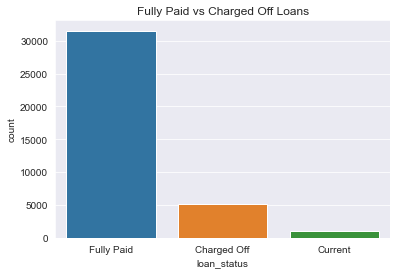

In [32]:
#print(loan.loan_status.value_counts())
#loan.loan_status.value_counts().plot.bar()
#plt.show()

sns.countplot(x='loan_status', data=loan)
plt.title('Fully Paid vs Charged Off Loans')
plt.show()

In [33]:
loan = loan[loan.loan_status.isin(['Fully Paid','Charged Off'])]
loan.loan_status.value_counts()

Fully Paid     31534
Charged Off     5203
Name: loan_status, dtype: int64

### Binning (Segementing the Variables into ranges - Converting to categorical variable)
***

- Loan Amount field

In [34]:
loan['loan_amnt'].describe()

count    36737.000000
mean     11153.348123
std       7368.338940
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [35]:
#Create Derived categorical variable
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'],[x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

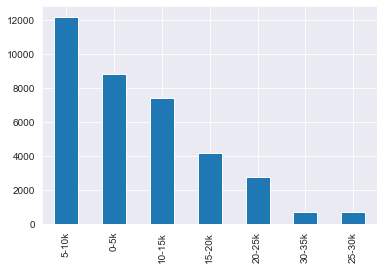

In [36]:
#plt.figure(figsize=(10,10))
loan['loan_amnt_bin'].value_counts().plot.bar()
plt.show()

> - Binning the dti field

In [37]:
#Create Derived categorical variable
loan['dti_bin'] = pd.cut(loan['dti'], 
                                      [x for x in range(0, 35, 5)], labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)])

In [38]:
loan['dti_bin'].head(5)

0    25-30
1      0-5
2     5-10
3    15-20
5    10-15
Name: dti_bin, dtype: category
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

> - Binning the Interest Rate field 

In [39]:
#Create Derived categorical variable
loan['ir_bin'] = pd.cut(loan['int_rate'], 
                                      [x for x in range(5, 30, 5)], labels=[str(x)+'-'+str(x+5)+'%' for x in range (5, 25, 5)])
loan['ir_bin'].head(5)

0    10-15%
1    15-20%
2    15-20%
3    10-15%
5     5-10%
Name: ir_bin, dtype: category
Categories (4, object): ['5-10%' < '10-15%' < '15-20%' < '20-25%']

> - Binning the Revol Util field 

In [40]:
#Create Derived categorical variable
loan['revol_util_bin'] = pd.cut(loan['revol_util'], 
                                      [x for x in range(0, 110, 10)], labels=[str(x)+'-'+str(x+10) for x in range (0, 100, 10)])
print(loan['revol_util_bin'].head())

0     80-90
1      0-10
2    90-100
3     20-30
5     20-30
Name: revol_util_bin, dtype: category
Categories (10, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '60-70' < '70-80' < '80-90' < '90-100']


> - Binning the Annual Income field 

In [41]:
loan['annual_inc'].describe()

count    3.673700e+04
mean     6.946723e+04
std      6.406256e+04
min      4.000000e+03
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [42]:
#Create Derived categorical variable
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], 
                                      [x for x in range(0, 110000, 10000)], labels=[str(x)+'k-'+str(x+10)+'k' for x in range (0, 100, 10)])
print(loan['annual_inc_bin'].head())

0    20k-30k
1    20k-30k
2    10k-20k
3    40k-50k
5    30k-40k
Name: annual_inc_bin, dtype: category
Categories (10, object): ['0k-10k' < '10k-20k' < '20k-30k' < '30k-40k' ... '60k-70k' < '70k-80k' < '80k-90k' < '90k-100k']


***
## Data Analysis

***
### 1. Univariate Analysis 

- Let's see if some of these variables follow the famous power law.

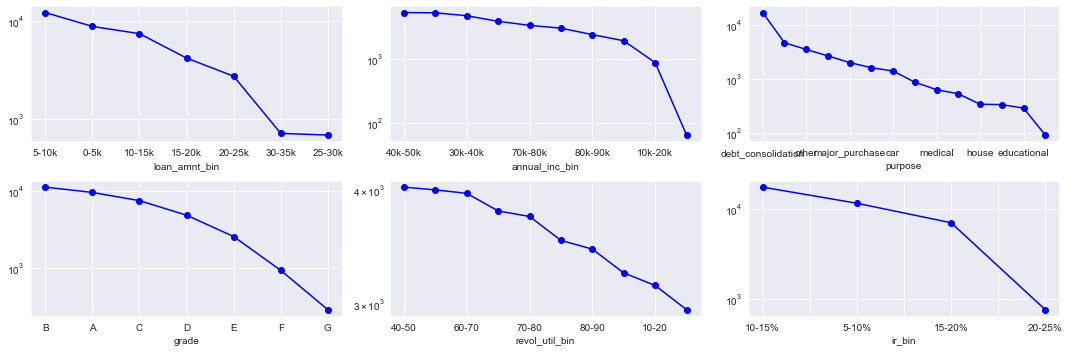

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(2, 3, 1)
loan.groupby('loan_amnt_bin').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 2)
loan.groupby('annual_inc_bin').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 3)
loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 4)
loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 5)
loan.groupby('revol_util_bin').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 6)
loan.groupby('ir_bin').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

#### Observations

1. > - Highest number of loans are disbursed where the amount is between 5k to 10k
2. > - Count of Loan disbursed remains relatively high for all Income ranges except for 10-20k 
3. > - Count of Loan disbursed for purpose follows Power law and the count for each category decreases gradually. Loan wil purpose `Debt  Consolidation` are highest.
4. > - Count of Loan disbursed for each Grade follows Power law and the count for each category decreases gradually. Grade B category loans are highest in count.
5. > - Count of Loan disbursed for range of Interest Rate follows Power law and the count for each category. Most of the Loans disbursed are having interest rate between 10-15%
6. > - Count of Loan disbursed for range of Revoution Utilization  follows Power law and the count for each category gradually

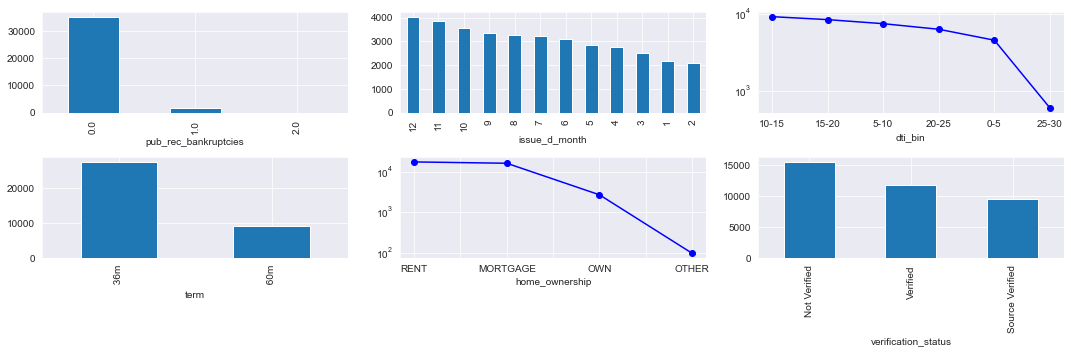

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(2, 3, 1)
loan.groupby('pub_rec_bankruptcies').loan_amnt.count().sort_values(ascending=False).plot(kind='bar')
plt.subplot(2, 3, 2)
loan.groupby('issue_d_month').loan_amnt.count().sort_values(ascending=False).plot(kind='bar')
plt.subplot(2, 3, 3)
loan.groupby('dti_bin').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 4)
loan.groupby('term').loan_amnt.count().sort_values(ascending=False).plot(kind='bar')
plt.subplot(2, 3, 5)
loan.groupby('home_ownership').term.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(2, 3, 6)
loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

#### Observations 

1. > - Count of Loan disbursed for pub_rec_bankruptcies skewed very highly in favour of 0.0
2. > - Count of Loan disbursed is highest for December followed by November, October- meaning Loans are disbursed mostly in the fall and festive time of the year 
3. > - Count of Loan disbursed for dti remains relatively same for most of the categories 
4. > - Count of Loan disbursed is very high for 36 months compared to 60 months
5. > - Count of Loan disbursed for Rent & Mortgage type of Home-Ownership is high compared to other categories.
6. > - Large number of Loans disbursed are Not-Verified.

***
- Percentage Proportion of `Fully Paid` Loans vs `Charged Off` Loans

             count
loan_status       
Fully Paid   85.84
Charged Off  14.16


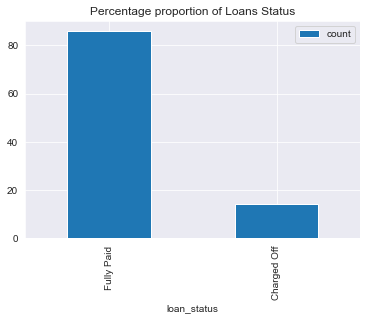

In [45]:
# Percentage of grade of loans in the dataset
print(loan.groupby(['loan_status']).loan_amnt.agg(['count']).sort_values('count',ascending=False).apply(lambda g: round((g / g.sum()*100),2)))

df1 = loan.groupby(['loan_status']).loan_amnt.agg(['count']).sort_values('count',ascending=False).apply(lambda g: round((g / g.sum()*100),2))
df1.plot.bar()
plt.title('Percentage proportion of Loans Status')
plt.show()

***
- Employee Experience 

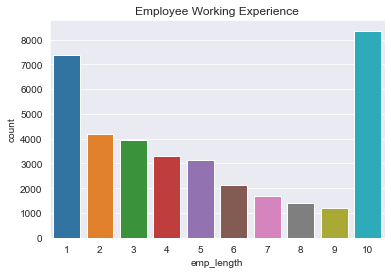

In [46]:
sns.countplot(x='emp_length', data=loan)
plt.title('Employee Working Experience')
plt.show()

> Either people with more than 10 or more year of experience are having highest number of loans disbursed
***

- The spread of the Loan Amount

Median for Loan Amount Value -  10000.0


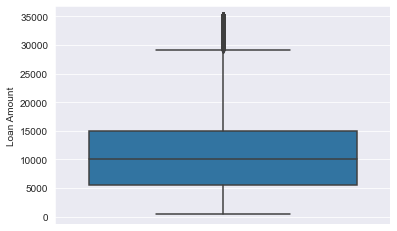

In [47]:
print('Median for Loan Amount Value - ', loan["loan_amnt"].median() )
sns.boxplot( y=loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

***
- Count of Loans for each Grade

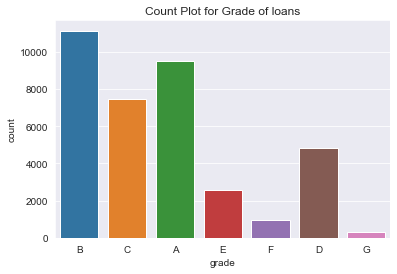

In [48]:
sns.countplot(x='grade', data=loan)
plt.title('Count Plot for Grade of loans')
plt.show()

<Figure size 1440x1872 with 0 Axes>

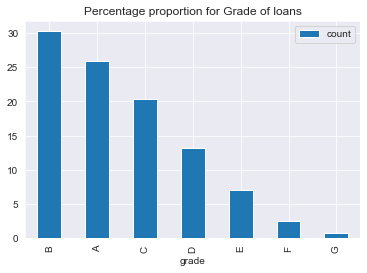

In [49]:
# Percentage of grade of loans in the dataset
plt.figure(figsize=([20,26]))
df2 = loan.groupby(['grade']).grade.agg(['count']).sort_values('count',ascending=False).apply(lambda g: round((g / g.sum()*100),2))
df2.plot.bar()
plt.title('Percentage proportion for Grade of loans')
plt.show()

- Percentage of sub_grade of loans in the dataset

<Figure size 1440x1872 with 0 Axes>

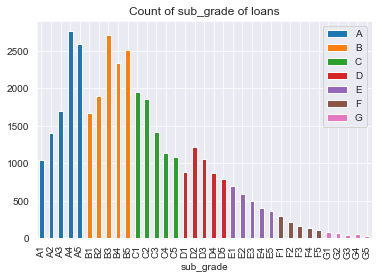

In [50]:
plt.figure(figsize=(20,26))
ax = loan.groupby(['sub_grade']).grade.value_counts().unstack().plot(kind='bar',stacked=True)
plt.legend()
plt.title('Count of sub_grade of loans')
plt.show()

>>- G Grade/subgrade loans are least in number, which clearly highlights them as Risk and Lending Club is already avoiding them
>>- B Grade.Subgrade loans are disbursed highest followed by A

### 2. Segmented Univariate Analysis 

***
- Loan Amount (Binned)

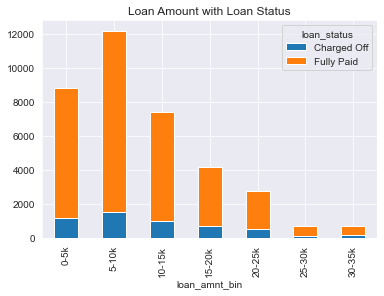

In [51]:
loan.groupby(['loan_amnt_bin']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Loan Amount with Loan Status')
plt.show()

***
- Home Ownership 

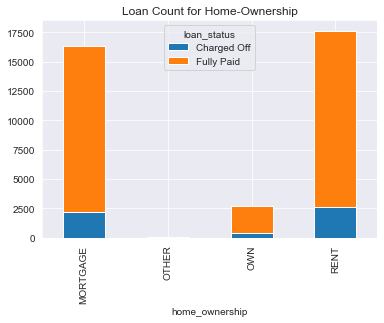

In [52]:
loan.groupby(['home_ownership']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Loan Count for Home-Ownership')
plt.show()

>> - Home-Ownership which have category of 'OWN' are less likely to be 'Charged Off'

***
- Verification Status

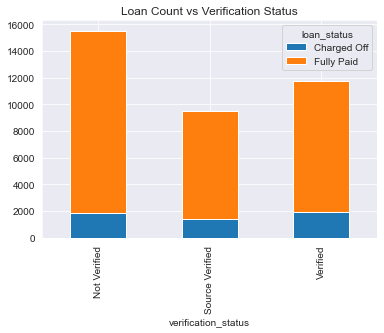

In [53]:
loan.groupby(['verification_status']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Loan Count vs Verification Status')
plt.show()

***
- Purpose of the Loan 

<Figure size 720x720 with 0 Axes>

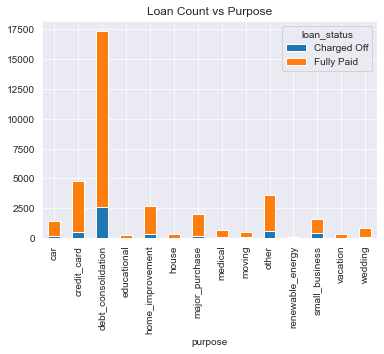

In [54]:
plt.figure(figsize=(10,10))
loan.groupby(['purpose']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Loan Count vs Purpose')
plt.show()

- Lets see the percentage proportion of the Loans for each purpose which were 'Charged Off'

Text(0.5, 1.0, 'Percentage proportion of Purpose for Charged Off Loans')

<Figure size 1440x1872 with 0 Axes>

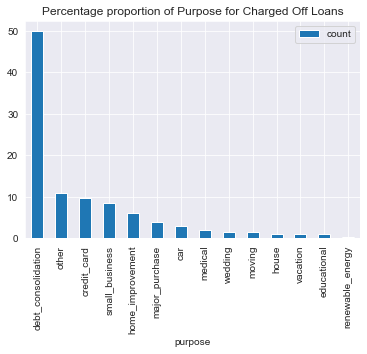

In [55]:
plt.figure(figsize=([20,26]))
df2 = loan[loan.loan_status == 'Charged Off'].groupby(['purpose']).grade.agg(['count']).sort_values('count',ascending=False).apply(lambda g: round((g / g.sum()*100),2))
df2.plot.bar()
plt.title('Percentage proportion of Purpose for Charged Off Loans')

- Large percentage of which were 'Charged Off' were 'Debt Consolidation', 'Other', 'debit_card' followed by other 

Text(0.5, 1.0, 'Percentage proprtions of Loans in each State')

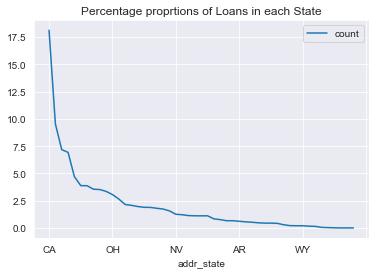

In [56]:
loan.groupby(['addr_state']).loan_status.agg(['count']).sort_values('count',ascending=False).apply(lambda g: round((g / g.sum()*100),2)).plot()
plt.title('Percentage proprtions of Loans in each State')

- Clearly 'CA' state have highest percentage of Loans Charged Off 

In [57]:
df = loan[loan.loan_status == 'Charged Off']
df.groupby(['addr_state']).loan_status.value_counts().sort_values(ascending=False)

addr_state  loan_status
CA          Charged Off    1032
FL          Charged Off     459
NY          Charged Off     454
TX          Charged Off     295
NJ          Charged Off     266
GA          Charged Off     200
IL          Charged Off     189
VA          Charged Off     167
PA          Charged Off     166
MD          Charged Off     148
MA          Charged Off     147
OH          Charged Off     142
WA          Charged Off     116
AZ          Charged Off     113
MO          Charged Off     103
NV          Charged Off     101
NC          Charged Off     101
MI          Charged Off      94
CO          Charged Off      87
CT          Charged Off      86
MN          Charged Off      75
OR          Charged Off      68
SC          Charged Off      64
WI          Charged Off      58
LA          Charged Off      52
AL          Charged Off      49
KY          Charged Off      44
OK          Charged Off      39
UT          Charged Off      37
NM          Charged Off      29
HI          Char

***
- Debt to Income Ration (dti)

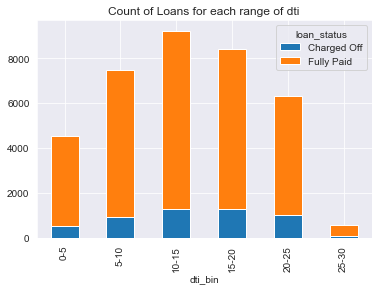

In [58]:
loan.groupby(['dti_bin']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans for each range of dti')
plt.show()

- Clearly, The Charged Off Loans are present in all the categories of dti (Debt to Income Ratio) but seems 10-15 band is relatively less risk given the percentage of Charged Off Loans are less 

***
- Interest Rate (Binned) 

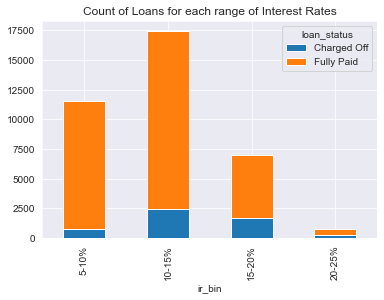

In [59]:
loan.groupby(['ir_bin']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans for each range of Interest Rates')
plt.show()

>>- Loans with Interest Rate between 0-5% are safer while those one having higher than 20% are riskier

***
- Issued Month 

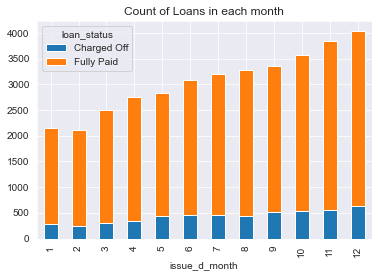

In [60]:
loan.groupby(['issue_d_month']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans in each month')
plt.show()

>>- Clearly, the more loands are disbursed at the end of the year. No clear indication of which month would be risky 

***
- Issued Year 

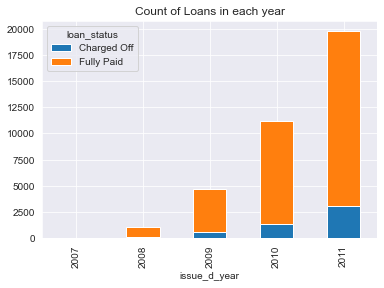

In [61]:
loan.groupby(['issue_d_year']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans in each year')
plt.show()

>> Higher loans are disbursed in 2011 followed by 2010 and others 

***
- `pub_rec_bankruptcies`

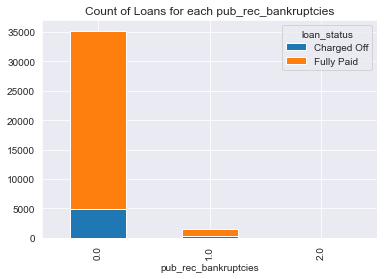

In [62]:
loan.groupby(['pub_rec_bankruptcies']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans for each pub_rec_bankruptcies')
plt.show()

>>- The data is highly skewed, for value 0 

***
- revol_util_bin field

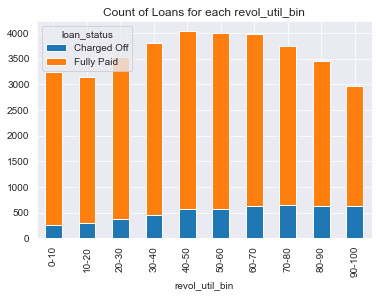

In [63]:
loan.groupby(['revol_util_bin']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans for each revol_util_bin')
plt.show()

>> More Loans are `Charged Off` for revol_util over 50

***
- Income Range 

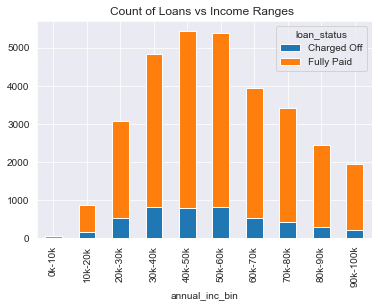

In [64]:
loan.groupby(['annual_inc_bin']).loan_status.value_counts().unstack().plot(kind='bar',stacked=True)
plt.title('Count of Loans vs Income Ranges ')
plt.show()

- People with High Income Range have less proportion of 'Charged Off' Loans

***
- Term of Loan vs Purpose

plt.figure(figsize=(10,10))
sns.countplot( x="term", hue='purpose', data=loan)
plt.xlabel('Loan Term in Months')
plt.show()

>> - Debt Reconstruction Loan are given highest in both category 

***
## 3. Bi-variate Analysis 

***
- Loan Status vs Interest Rate 

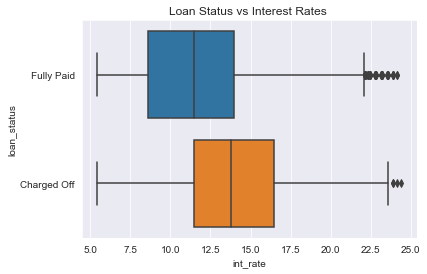

In [65]:
sns.boxplot(x=loan['int_rate'], y=loan['loan_status'], data=loan)
plt.title('Loan Status vs Interest Rates ')
plt.show()

>>- The Median value of 'Charged Off' loans shows to have higher Interest Rate. Meaning for high Interest Rate, The loans becomes Risky

***
- Loan Status vs Loan Amount 

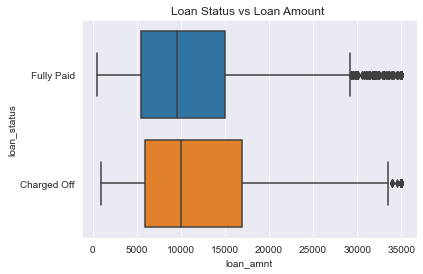

In [66]:
sns.boxplot(x=loan['loan_amnt'], y=loan['loan_status'], data=loan)
plt.title('Loan Status vs Loan Amount ')
plt.show()

>>- The Loans where the loan_amnt value is higher are Charged Off higher in proportion than the Full Paid Loans.

### SInce Interest Rate, Loan Amount, Term and Grade are the main driving parameter for Riskier Loans, We will analyse thier behaviour with each of the categorical variable

***
- Interest Rate vs Loan Status

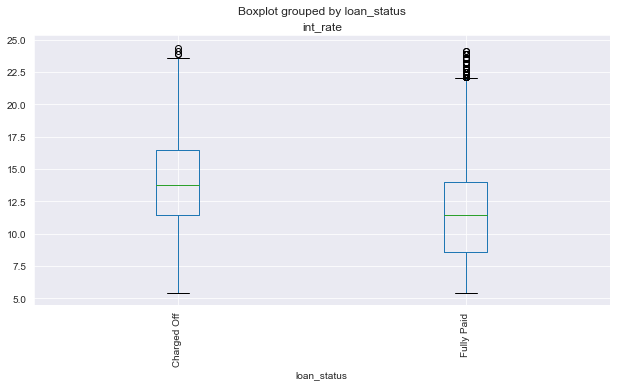

In [67]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='loan_status', ax=ax, rot=90)
plt.show()

>> - The Charged Off loans have higher median value of Interest Rates. This clearly indicates loans disbursed at high interest Rate are risky 

***
- Interest Rate vs Grade of the Loan

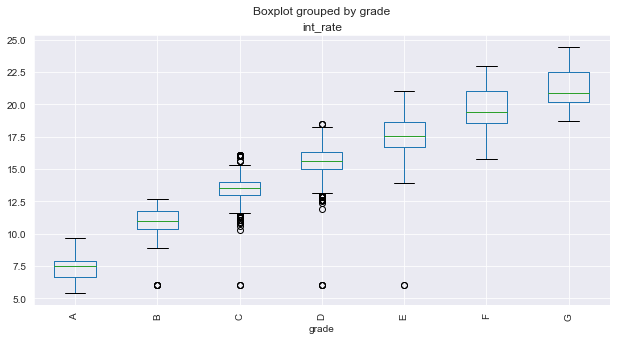

In [68]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90 )
plt.show()

> - Clearly, The Grade form A to G have higher Interest Rates applied respectively. Meaning Riskier Loans come with high Interest Rate.

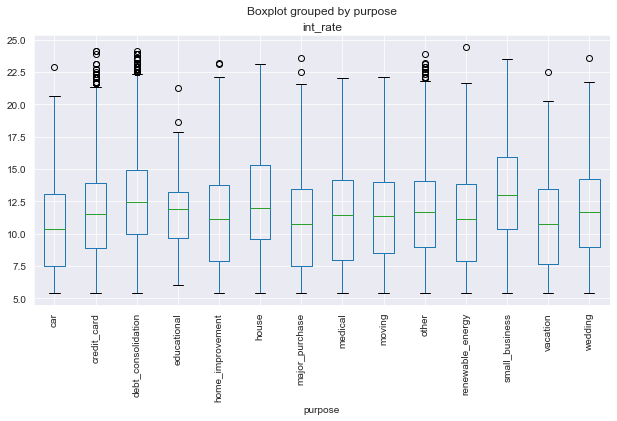

In [69]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='purpose', ax=ax, rot=90)
plt.show()

>>- The outlier count in 'credit_card', 'debt_consolidation' and 'other' indicates a lot of such loans are disbursed at high interest rate than usual
>>- The median value for all purpose seems to be around 12.5 

***
- Interest Rate vs Term of Loan

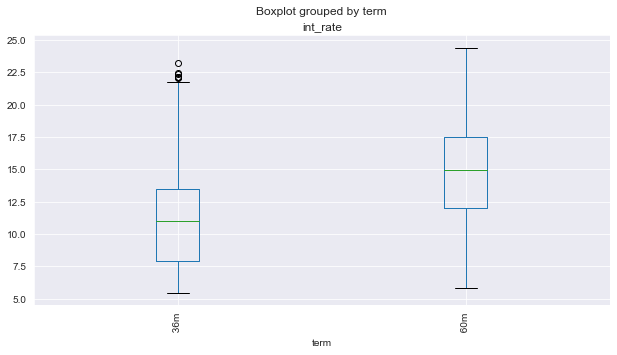

In [70]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='term', ax=ax, rot=90)
plt.show()

>> Loans disbursed for 60-months term are Riskier as generally the interest Rate on such loans is comparatively higher than 36 months

***
- Interest Rate vs Home-Ownership

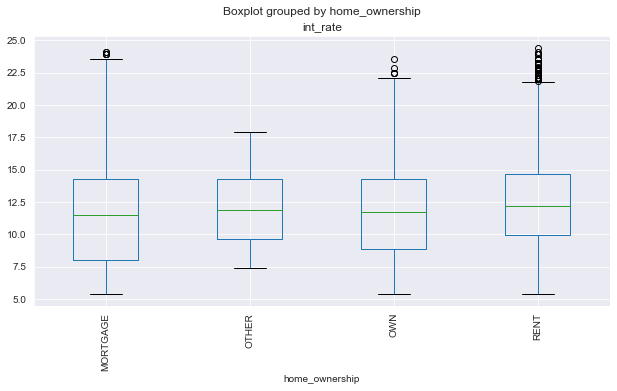

In [71]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='home_ownership', ax=ax, rot=90)
plt.show()

>> - Not very clearly but the outliers for 'RENT' shows Risk as the number of such loans are disbursed at high interest Rate 

***
- Interest Rate vs Verification Status

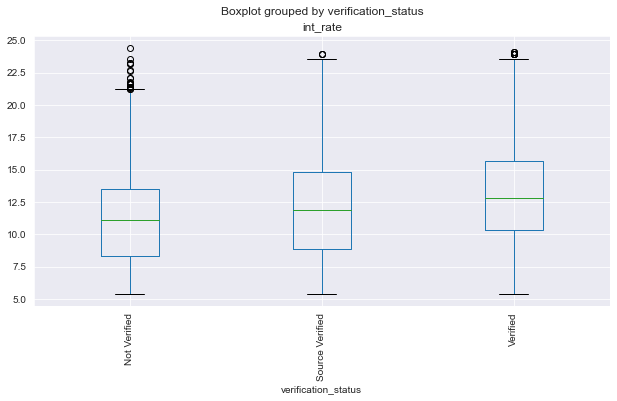

In [72]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='verification_status', ax=ax, rot=90)
plt.show()

>> - Its not clear from the Verification status which category would be risky

***
- Interest Rate vs Loan Amount

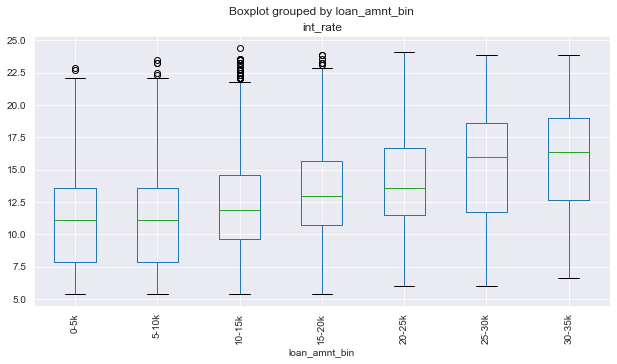

In [73]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='loan_amnt_bin', ax=ax, rot=90)
plt.show()

>> - Loans disbursed with large value of Loan Amount have median value of Interest Rate on the higher side meaning them as Riskier 

***
- Annual Income vs Loan Amount

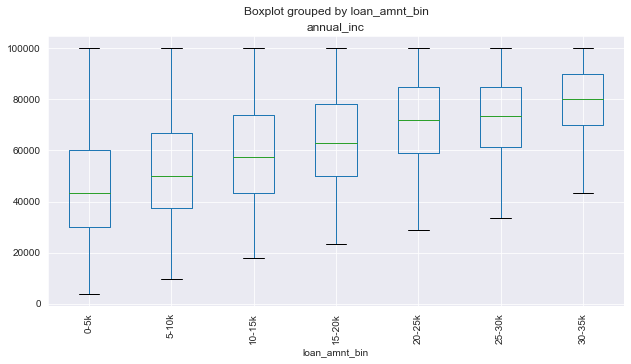

In [74]:
dfl = loan[loan['annual_inc'] <= 100000]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
dfl.boxplot(column=['annual_inc'],by='loan_amnt_bin', ax=ax, rot=90)
plt.show()

>> - Higher loans were offered to Applicants with High Income Range

***
- Interest Rate vs Annual Income

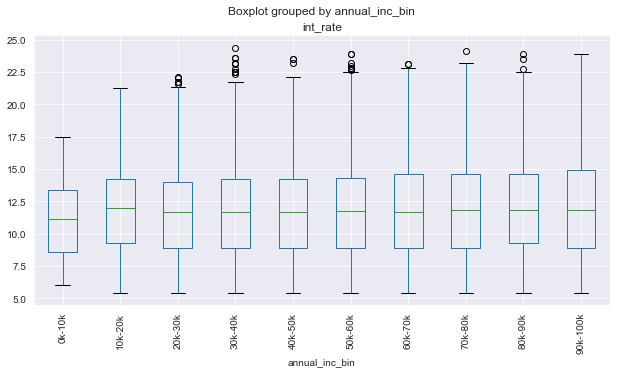

In [75]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
dfl.boxplot(column=['int_rate'],by='annual_inc_bin', ax=ax, rot=90)
plt.show()

>> There are number of outliers in the 30-40k Annual Income range given on high interest Rates. Otherwise there is no clear indication. 

*** 
- Interest Rate vs DTI

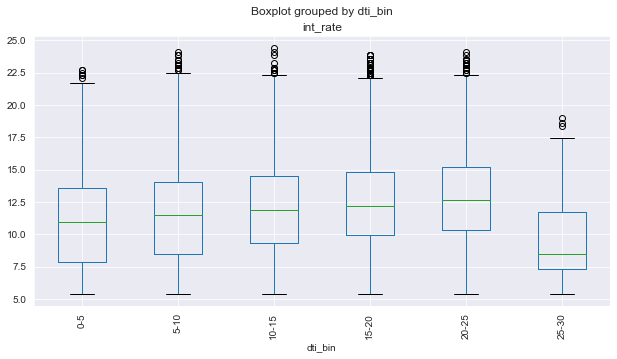

In [76]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='dti_bin', ax=ax, rot=90)
plt.show()

>> - Strangely, The DTI range of 25-30 have lowest median value for Interest Rate

***
- Interest Rate vs revol_utilization 

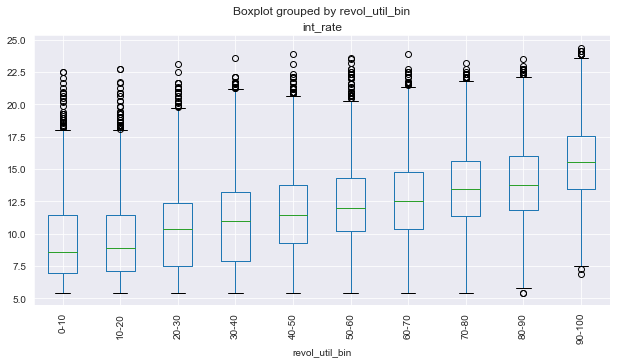

In [77]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='revol_util_bin', ax=ax, rot=90)
plt.show()

>> - Clear Indication of High 'revol_utilization' attracts high loan interest

***
- Revol Utilization vs Grade

<Figure size 1440x360 with 0 Axes>

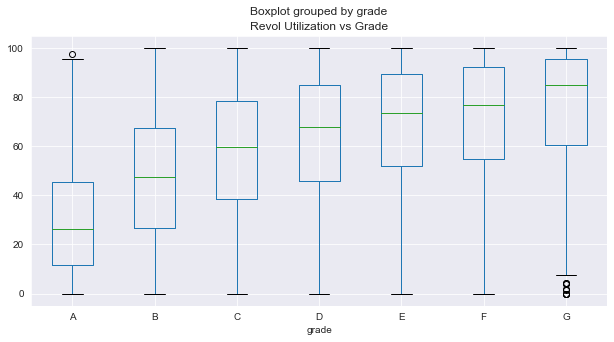

In [78]:
plt.figure(figsize=(20,5))
loan.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.title('Revol Utilization vs Grade')
plt.show()

>> - The Revol utilization median count is higher for Grade G and F loans. This means as the Revol_Utilization increases the Risk of the Loan increases 

***
### Bar Plots with three fields involved 

***
- Loan Amount vs Grade vs Term 

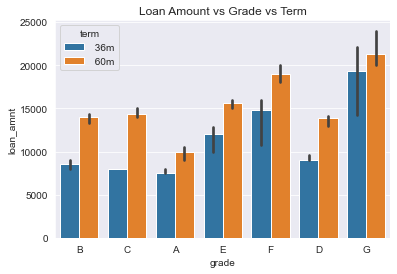

In [79]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.median)
plt.title('Loan Amount vs Grade vs Term')
plt.show()

>> - Loans of Grade G are given for higher term and for higher loan amount

***
- Term vs Interest Rate vs Loan Status

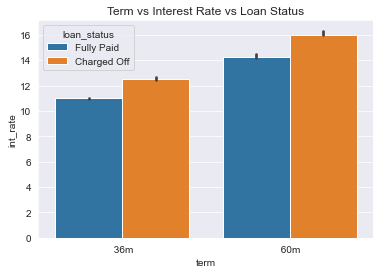

In [80]:
sns.barplot(x='term', y='int_rate', hue="loan_status", data=loan, estimator=np.median)
plt.title('Term vs Interest Rate vs Loan Status')
plt.show()

>> Comparatively, Higher number of Loans are charged off for 60m onths terms while attracting higher Interest Rate

***
- Loan Amount vs Interest Rate vs Loan Status

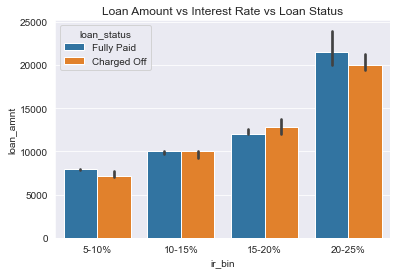

In [81]:
sns.barplot(x='ir_bin', y='loan_amnt', hue="loan_status", data=loan, estimator=np.median)
plt.title('Loan Amount vs Interest Rate vs Loan Status')
plt.show()

>> - This plot also proves the case that Loans disbursed with high amount attracts higher Interest Rates and carries more Risk to be 'Charged Off '

***
Purpose vs Employee Experience vs Loan Status

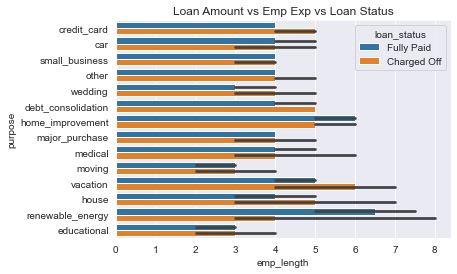

In [82]:
sns.barplot(x='emp_length', y='purpose', hue="loan_status", data=loan, estimator=np.median)
plt.title('Loan Amount vs Emp Exp vs Loan Status')
plt.show()

>> - No such distinguishable observation across the Employee Experience range

***
- Plot for delinq_2yrs vs int_rate vs loan_status

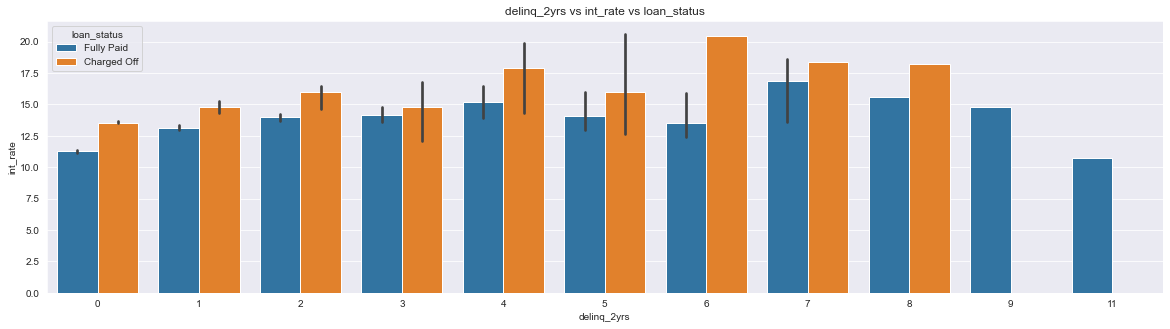

In [83]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan, estimator=np.median)
plt.title('delinq_2yrs vs int_rate vs loan_status')
plt.show()

>> - Interestingly, The Loans with delinq_2yrs of value 6, 7 and 8 are higher value for Interest Rate and there are no 'Charged Off' loans for delinq_2yrs of value 9 and 10 which could mean them as safer values 


***
### Catplots 

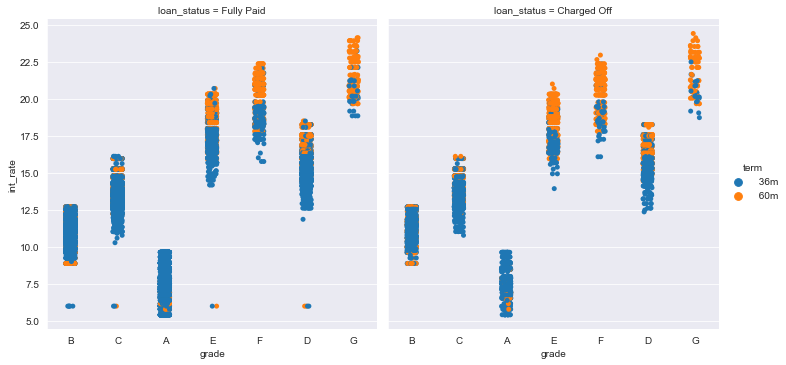

In [84]:
sns.catplot(data=loan,x="grade",y="int_rate",hue="term",col="loan_status")
plt.show()

>> - Again, Charged Off Loans are usually off 60 months terms and with High Interest Rates

### Analysing only 'Charged Off' Loans

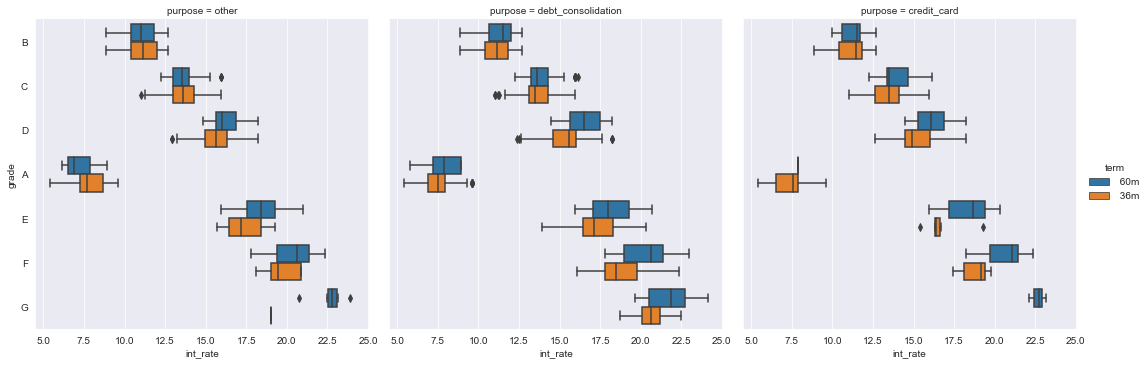

In [85]:
sns.catplot(data=loan[(loan['loan_status'] == "Charged Off") & (loan['purpose'].isin(['debt_consolidation','other','credit_card'])) ],x="int_rate",y="grade",hue="term",col="purpose", kind="box")
plt.show()

>> - G grade loans for Purpose of 'debt_consolidation','other','credit_card' are Riskier 

***
# Recommendation
***

### <font color=green>Lending Club should avoid giving High Loan Amount of Grade G with High Interest Rate of term 60 months as they are more risky to be turned into 'Charged Off'</font>
***
***

***
## - Ending Note

***
Strangely, The Loan amount with High Value disbursed in the state of Wyoming are more likely to be 'Charged off' than others. The Application for High Loan Amount from this state can be considered Risky

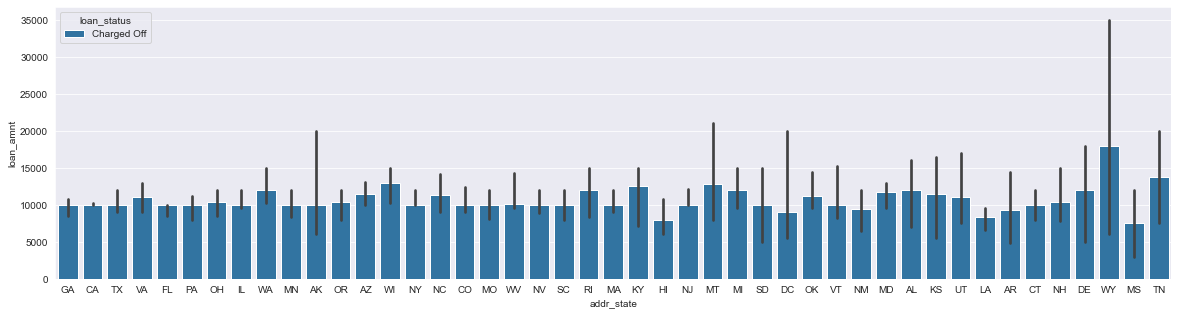

In [86]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan.loc[loan.loan_status == "Charged Off"], estimator=np.median)
plt.show()

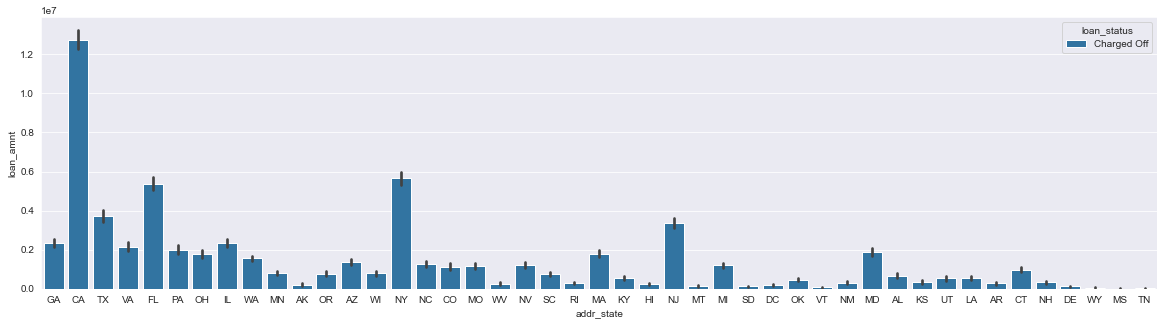

In [87]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan.loc[loan.loan_status == "Charged Off"], estimator=np.sum)
plt.show()

>> - Although the Total Loan amount disbursed for 'Charged Off' Loans in state 'CA', 'NY', 'FL' are high

***
#### Thank you!
#### Abhishek Singh ( aulakh.abhishek@gmail.com)
#### Dated: 19 May 2021

***